# Compare clustering methods — Dortmund (PCA)

This  notebook loads `dataset/Dortmund_pca.csv` and runs `functions.compare_clusters.compare_clusters` with a small default configuration.


In [1]:
import pandas as pd
from functions.compare_clusters import CompareConfig, ClusterConfig, compare_clusters
from functions.feature_preprocessing import load_preprocessed_data


Running KMeans...
  Auto-detecting optimal k using silhouette...
  Optimal k: 2
Internal Validation Metrics:
--------------------------------------------------
  Silhouette Score:         0.1777
    Range: [-1, 1], Higher is better
  Davies-Bouldin Index:     1.9894
    Range: [0, ∞), Lower is better
  Calinski-Harabasz Score:  133.2703
    Range: [0, ∞), Higher is better
  Within-Cluster Variance:  58392.8667
    Lower is better
  Cluster Compactness:
    Cluster 0: 9.7947
    Cluster 1: 8.8289

  Clusters found: 2

Running Agglomerative...
  Auto-detecting optimal n using silhouette...
  Optimal n: 2
Internal Validation Metrics:
--------------------------------------------------
  Silhouette Score:         0.1553
    Range: [-1, 1], Higher is better
  Davies-Bouldin Index:     2.0959
    Range: [0, ∞), Lower is better
  Calinski-Harabasz Score:  107.1658
    Range: [0, ∞), Higher is better
  Within-Cluster Variance:  60554.5111
    Lower is better
  Cluster Compactness:
    Cluster 

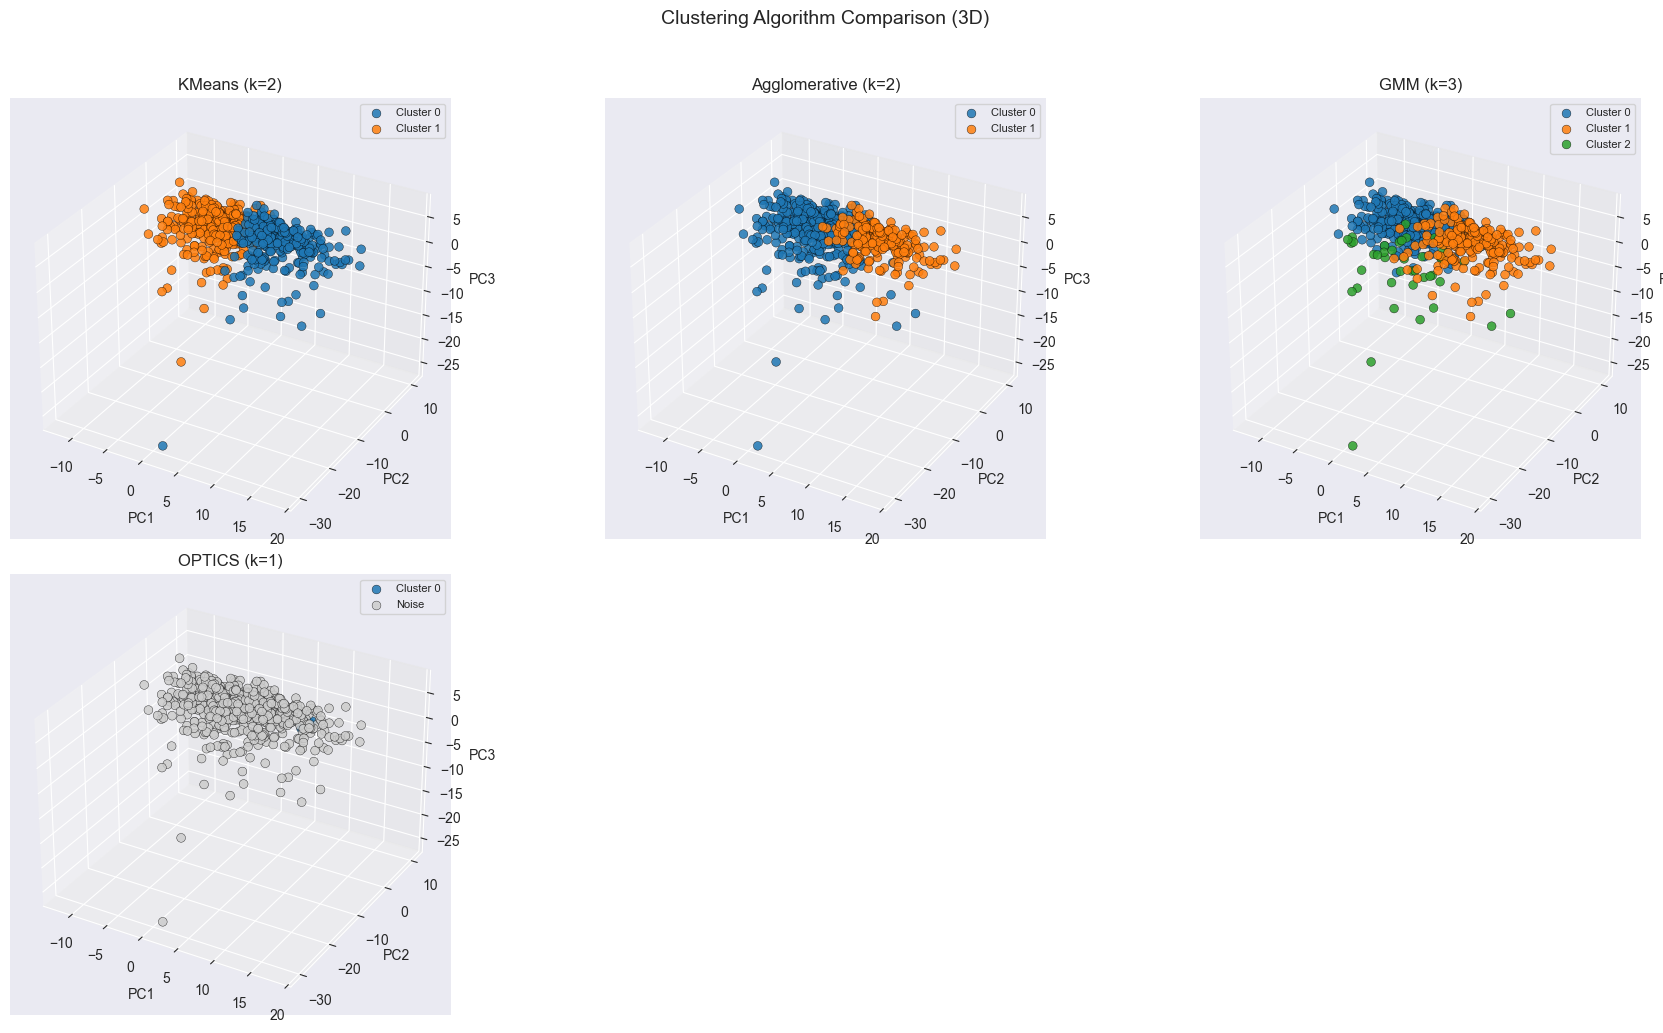

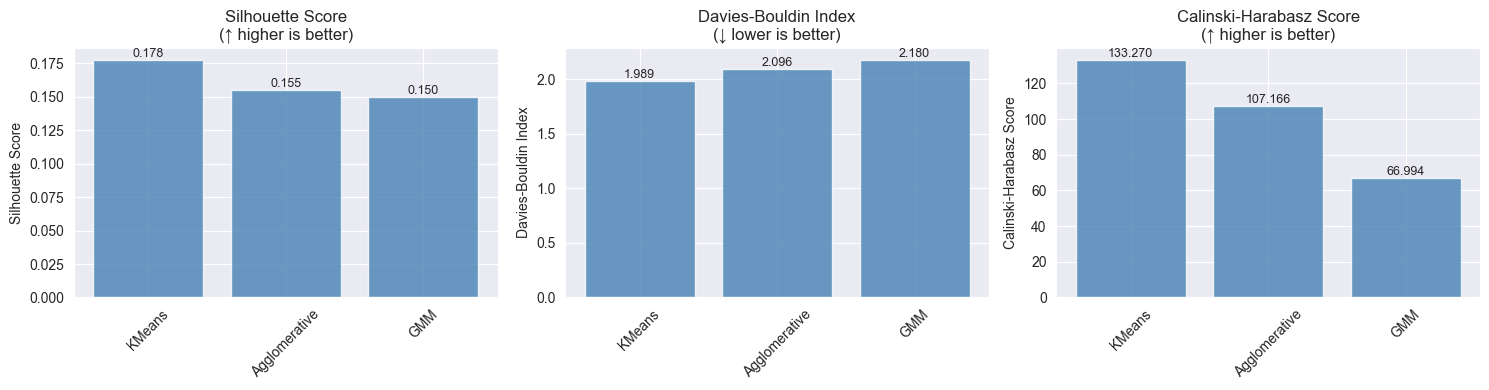

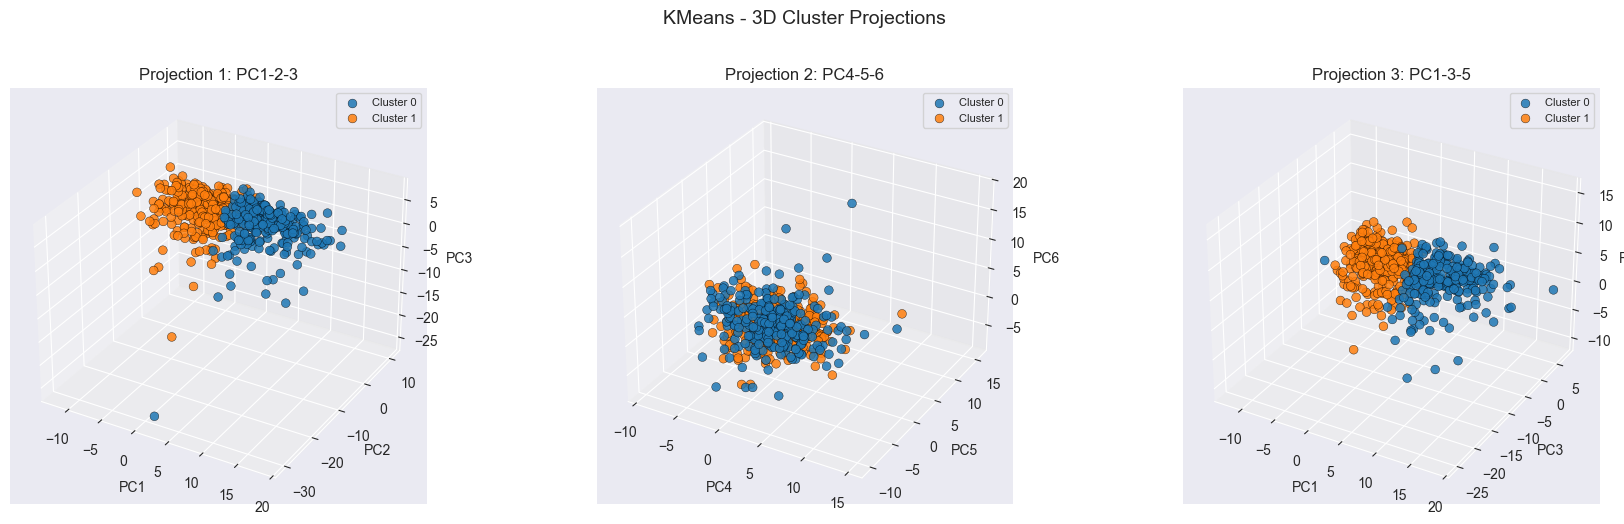

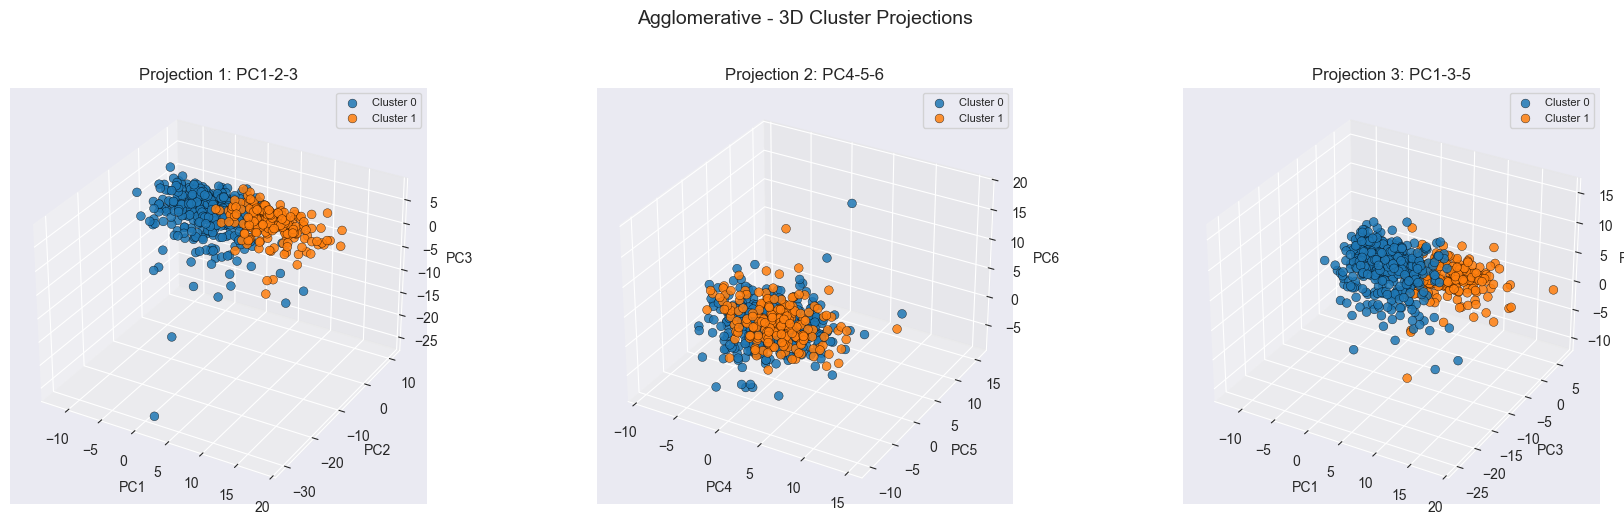

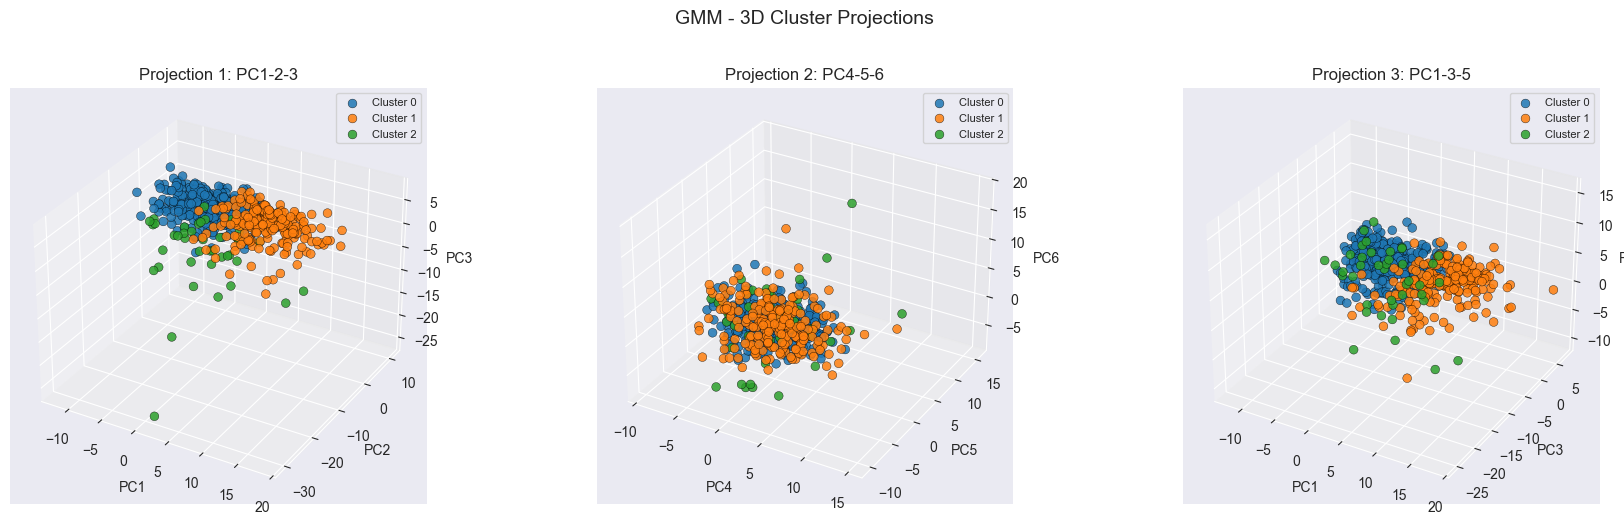

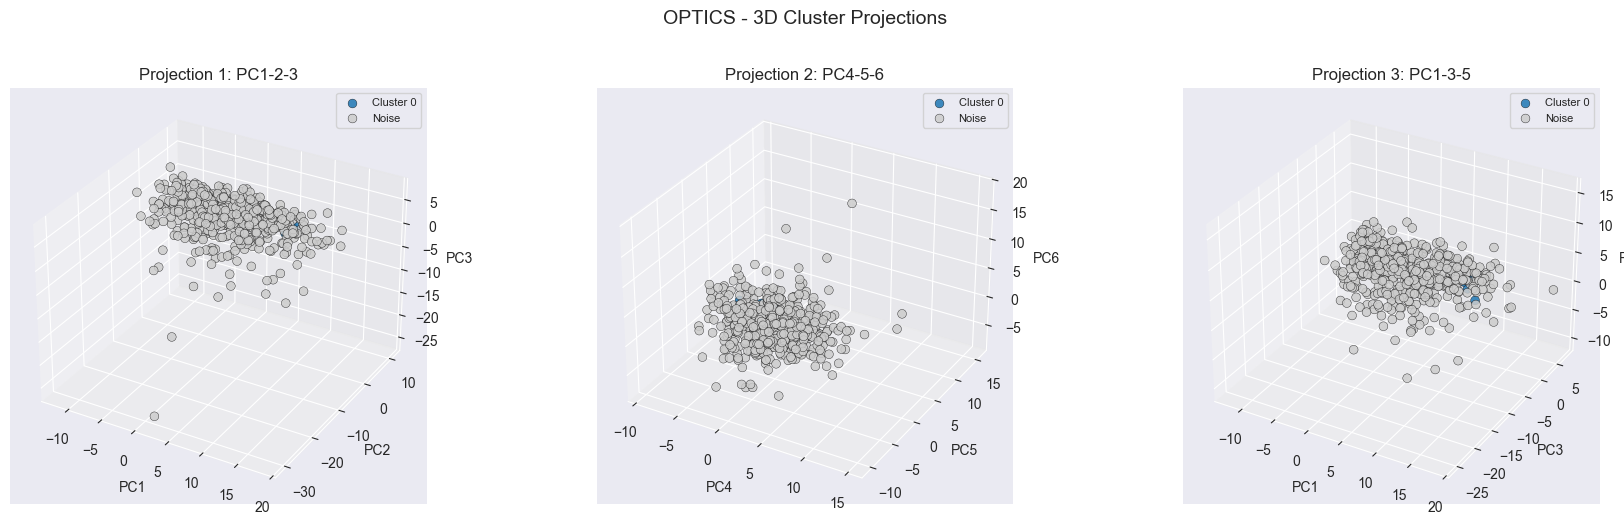


Summary Comparison
       Algorithm  Clusters  Noise Points Silhouette Davies-Bouldin Calinski-Harabasz
0         KMeans         2             0     0.1777         1.9894            133.27
1  Agglomerative         2             0     0.1553         2.0959            107.17
2            GMM         3             0     0.1496         2.1804             66.99
3         OPTICS         1           595        NaN            NaN               NaN


"\nfor name, res in results.items():\n    labels = res['labels']\n    out = pd.DataFrame({'label': labels}, index=X.index)\n    out.to_csv(f'dataset/{name}_Dortmund_pca_labels.csv')\n"

In [2]:

data, features, subject_ids  = load_preprocessed_data('dataset/Dortmund_pca.csv')

config = CompareConfig(visualize_3d=True)

results = compare_clusters(data, config=config, feature_names=list(data.columns), verbose=True)


# optional save of cluster labels
"""
for name, res in results.items():
    labels = res['labels']
    out = pd.DataFrame({'label': labels}, index=X.index)
    out.to_csv(f'dataset/{name}_Dortmund_pca_labels.csv')
"""

# External Metrics


       Epsilon-squared (ε²) = 0.0224 (Small)


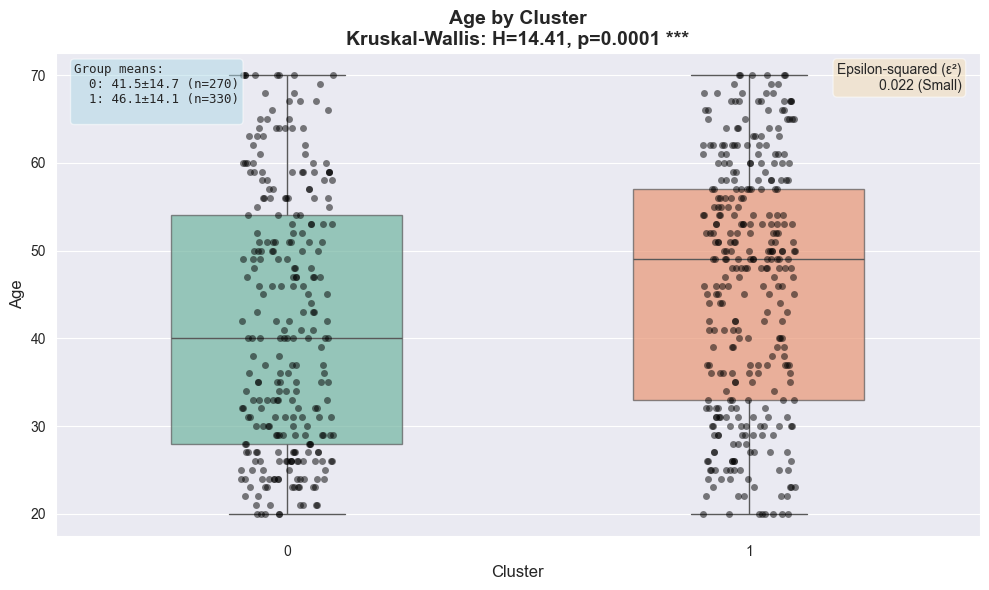


SUMMARY Continuous Variable
Test used: Kruskal-Wallis
Result: SIGNIFICANT (p=0.0001)
Significant pairs: [(np.int64(0), np.int64(1))]
Effect size: Epsilon-squared (ε²) = 0.0224 (Small)


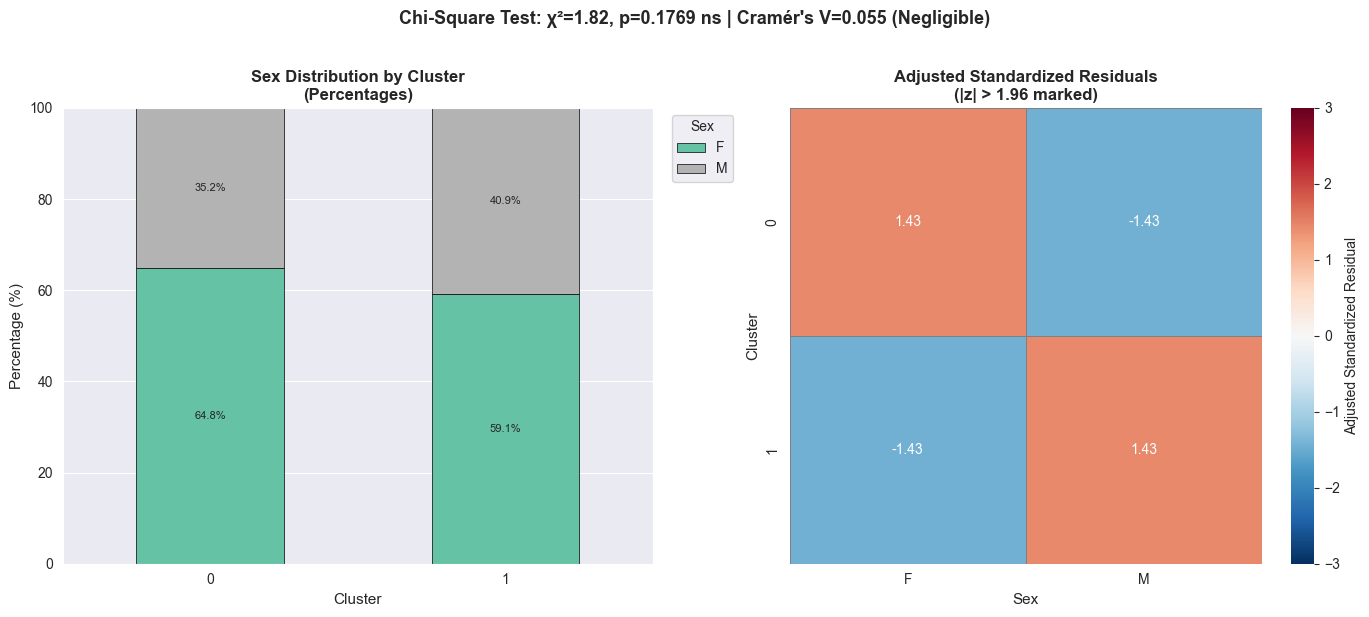


SUMMARY Categorical Analysis
Test used: Chi-Square Test
Result: NOT SIGNIFICANT (p=0.1769)
Effect size: Cramér's V = 0.0551 (Negligible)


In [3]:
from metrics.external_metrics import analyze_continuous_variable, analyze_categorical_variable, load_external_variables

# Load external variables
age, sex = load_external_variables("dataset/Dortmund_age&sex.csv", subject_ids=subject_ids)

# Cluster Names ['KMeans', 'Agglomerative', 'GMM', 'OPTICS']
cluster_labels = results['KMeans']['labels']

df_demographics = pd.DataFrame({
    'Cluster': cluster_labels,  # Replace with your best model's labels
    'Age': age,
    'Sex': sex
})

age_result = analyze_continuous_variable(df_demographics, 'Cluster', 'Age')

sex_result = analyze_categorical_variable(df_demographics, 'Cluster', 'Sex')